In [113]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.nlp import *
from sklearn.linear_model import LogisticRegression

## create dataset

In [114]:
PATH='data/aclImdb/'
names = ['neg','pos']
names1 = ['neg', 'pos_']
names2 = ['neg_', 'pos']

In [115]:
! ls {PATH}train

labeledBow.feat pos             unsupBow.feat   urls_pos.txt
neg             unsup           urls_neg.txt    urls_unsup.txt


In [116]:
trn1,trn1_y = texts_labels_from_folders(f'{PATH}train',names1)
val1,val1_y = texts_labels_from_folders(f'{PATH}test',names1)

In [117]:
trn2,trn2_y = texts_labels_from_folders(f'{PATH}train',names2)
val2,val2_y = texts_labels_from_folders(f'{PATH}test',names2)

In [118]:
len(trn1), len(trn1_y), len(trn2), len(trn2_y)

(12500, 12500, 12500, 12500)

In [119]:
assert (trn1_y==0).all()
(trn1_y==0).all()

True

In [120]:
assert (trn1_y==0).all()
(val1_y==0).all()

True

In [121]:
assert (trn2_y==1).all()
(trn2_y==1).all()

True

In [122]:
assert (val2_y==1).all()
(val2_y==1).all()

True

In [123]:
def sample_util(data, label, n):
    assert len(data) == label.shape[0]
    idx = np.random.choice(range(len(data)),n)
    data_new = [data[i] for i in idx]
    label_new = label[idx]
    return data_new, label_new

In [124]:
def sample(data1, label1, data2, label2, n):
    t1, t2 = sample_util(data1, label1, n)
    t3, t4 = sample_util(data2, label2, n)
    data = t1 + t3
    label = np.concatenate((t2, t4))
    return data, label

In [125]:
trn, trn_y = sample(trn1, trn1_y, trn2, trn2_y, 64*10)
val, val_y = sample(val1, val1_y, val2, val2_y, 64*20)

In [126]:
# trn,trn_y = texts_labels_from_folders(f'{PATH}train',names)
# val,val_y = texts_labels_from_folders(f'{PATH}test',names)

## create vectors and vocab

In [127]:
veczr = CountVectorizer(tokenizer=tokenize)

In [128]:
trn_term_doc = veczr.fit_transform(trn)

In [129]:
val_term_doc = veczr.transform(val)

In [130]:
vocab = veczr.get_feature_names(); vocab[5000:5005]

['derivitive', 'dermot', 'dern', 'derris', 'derrière']

In [131]:
vocab[:5]

['!', '"', '#', '$', '%']

In [132]:
len(vocab)

20514

In [133]:
trn_term_doc = trn_term_doc.sign()

In [134]:
val_term_doc = val_term_doc.sign()

## Naive Bayes

We define the **log-count ratio** $r$ for each word $f$:

$r = \log \frac{\text{ratio of feature $f$ in positive documents}}{\text{ratio of feature $f$ in negative documents}}$

where ratio of feature $f$ in positive documents is the number of times a positive document has a feature divided by the number of positive documents.

In [135]:
def pr(y_i):
    p = x[y==y_i].sum(0)
    return p+1

In [136]:
x=trn_term_doc
y=trn_y

p = pr(1)/pr(1).sum()
q = pr(0)/pr(0).sum()
r = np.log(p/q)
b = np.log((y==1).mean() / (y==0).mean())

In [137]:
val_term_doc.shape

(2560, 20514)

In [138]:
val_term_doc.shape[1]

20514

In [139]:
x.shape

(1280, 20514)

In [140]:
r.shape

(1, 20514)

In [141]:
(val_term_doc @ r.T).shape

(2560, 1)

In [142]:
val_term_doc @ r.T

matrix([[-34.33506],
        [ -5.6893 ],
        [-15.71129],
        ...,
        [ -1.72221],
        [  6.42638],
        [  2.96678]])

In [143]:
val_y

array([0, 0, 0, ..., 1, 1, 1])

In [144]:
pre_preds = val_term_doc @ r.T + b
preds = pre_preds.T>0
(preds==val_y).mean()

0.809765625

In [145]:
pre_preds = val_term_doc @ np.stack([np.log(p), np.log(q)]).T + b

In [146]:
pre_preds

matrix([[-1633.44535, -1599.11029],
        [ -898.01433,  -892.32503],
        [-1161.44244, -1145.73114],
        ...,
        [ -748.16611,  -746.4439 ],
        [ -737.6391 ,  -744.06548],
        [ -702.48435,  -705.45113]])

In [147]:
preds = pre_preds.T[0] > pre_preds.T[1]
(preds==val_y).mean()

0.809765625

In [148]:
type(val_term_doc)

scipy.sparse.csr.csr_matrix

In [149]:
val_term_doc[0]

<1x20514 sparse matrix of type '<class 'numpy.int64'>'
	with 207 stored elements in Compressed Sparse Row format>

In [150]:
xx = val_term_doc[0]

In [151]:
xx.toarray().shape

(1, 20514)

In [152]:
[vocab[index] for index, i in enumerate(xx.toarray()[0]) if i > 0]

['"',
 '&',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '>',
 '?',
 'a',
 'abilities',
 'about',
 'actors',
 'adults',
 'all',
 'and',
 'annoying',
 'any',
 'appears',
 'are',
 'aren',
 'as',
 'ass',
 'at',
 'average',
 'bad',
 'badly',
 'be',
 'becomes',
 'before',
 'belongs',
 'bill',
 'bla',
 'blame',
 'bothersome',
 'br',
 'brothers',
 'caine',
 'can',
 'cast',
 'category',
 'century',
 'characters',
 'clue',
 'collection',
 'comedic',
 'comedies',
 'comedy',
 'considering',
 'convoluted',
 'coogan',
 'damn',
 'death',
 'dirty',
 'does',
 'dumb',
 'effort',
 'either',
 'even',
 'falls',
 'fan',
 'fans',
 'far',
 'film',
 'follow',
 'forgot',
 'funny',
 'futile',
 'gambit',
 'girl',
 'go',
 'going',
 'good',
 'had',
 'harry',
 'have',
 'her',
 'here',
 'horrible',
 'i',
 'if',
 'in',
 'include',
 'includes',
 'intelligent',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'kid',
 'kids',
 'latter',
 'laugh',
 'least',
 'like',
 'little',
 'll',
 'lousy',
 'love',
 'mai

In [153]:
total = 0
for index, i in enumerate(xx.toarray()[0]):
    if i:
        total += 1
total

207

## Logistic regression (sklearn)

Here is how we can fit logistic regression where the features are the unigrams.

In [154]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [155]:
m = LogisticRegression(C=1e8, dual=False, max_iter=1000)
m.fit(x, y)
preds = m.predict(val_term_doc)
(preds==val_y).mean()

0.828125

...and the regularized version

In [156]:
m = LogisticRegression(C=1.0, dual=False, max_iter=1000)
m.fit(x, y)
preds = m.predict(val_term_doc)
(preds==val_y).mean()

0.8296875

## Logistic regression (PyTorch)

In [157]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *
from fastai.nlp import *

import torch.nn as nn

In [158]:
class MySimpleNB(nn.Module):
    def __init__(self, nf, ny):
        super().__init__()
        self.w = nn.Embedding(nf, ny)
        # self.w = nn.Embedding(nf+1, ny)
        # self.w.weight.data.uniform_(-1, 1)
        self.w.weight.data = torch.FloatTensor(r.tolist()[0])
        self.w.weight.data = self.w.weight.data.reshape(-1, 1)
        # self.r = nn.Embedding(nf, ny)
        
    def forward(self, feat_idx):
        # self.w.weight.data[0] = 0
        idx = feat_idx - 1
        idx2 = [a for a in idx if a >= 0]
        idx3 = np.array(idx2)
        v = self.w(V(idx3))
        # r = self.r(feat_idx)
        # x = ((w+self.w_adj)*r/self.r_adj).sum(1)
        # x = w*r
        x = v.sum(1)
        # return F.softmax(x)
        # return x.reshape(1, -1)
        return x

In [159]:
def binary_loss(pred, y):
    # y2 = torch.max(y,axis=1)[0]
    y2 = np.argmax(y)
    p = torch.exp(pred) / (1+torch.exp(pred))
    result = torch.mean(-(y2 * torch.log(p) + (1-y2)*torch.log(1-p)))
    # return result.reshape(1, -1)
    return result

In [160]:
r.shape

(1, 20514)

In [161]:
len(vocab)

20514

In [162]:
net3 = MySimpleNB(len(vocab), 1)

In [163]:
net3.w.weight.data.shape

torch.Size([20514, 1])

In [164]:
r.shape

(1, 20514)

In [165]:
sl=val_term_doc.shape[1]
sl

20514

In [166]:
sl=val_term_doc.shape[1]
md = TextClassifierData.from_bow(
    trn_term_doc, trn_y,
    val_term_doc, val_y,
    100,
)

In [167]:
# ??TextClassifierData.from_bow

In [168]:
trn_term_doc.shape

(1280, 20514)

In [169]:
ii=0

In [170]:
net4 = MySimpleNB(len(vocab), 1)
# loss = nn.NLLLoss()
# loss = torch.nn.CrossEntropyLoss()
loss = binary_loss
lr = 1e-2
losses=[]

In [171]:
net4.w.weight

Parameter containing:
tensor([[-0.0197],
        [-0.0942],
        [-0.3430],
        ...,
        [ 0.6866],
        [ 0.6866],
        [ 0.6866]], requires_grad=True)

In [172]:
ii=2

In [173]:
t = md.trn_ds[ii]
ii = ii + 1
xt, _a, _b, yt = t

In [174]:
t

(array([    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     1,     7,    12,    14,   303,   316,   495,   800,   959,  1544,  1575,  1794,  2284,
         2674,  3205,  3423,  4453,  4576,  5469,  5581,  6432,  7078,  7734,  7735,  7756,  7860,  8451,
         8452,  8474,  8599,  8711,  8922,  9031,  9078,  9760,  9787,  9971, 10292, 10734, 10823, 10840,
        11920, 12111, 12129, 12223, 12796, 12802, 12808, 12932, 12992, 13247, 13389, 14649, 14714, 14755,
        15086, 15417, 15712, 15808, 16142, 16154, 16441, 16918, 16981, 17744, 17772, 18013, 18054, 18321,
        18325, 18391, 18545, 18841, 18895, 19221, 19495, 19748, 19796, 19987, 20163, 20238, 20260, 20265,
        20407, 20417]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 

In [175]:
xt.shape, len(vocab)

((100,), 20514)

In [176]:
xt.shape

(100,)

In [177]:
vocab[18178], len(vocab)

('technicians', 20514)

In [178]:
_a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [179]:
_a.sum()

85

In [180]:
_b

85

In [181]:
yt

array([1., 0.], dtype=float32)

In [182]:
md.trn_ds[ii]

(array([ 6725,  7078,  7094,  7257,  7300,  7519,  7540,  7905,  8236,  8451,  8474,  8573,  8675,  8686,
         8714,  8717,  8875,  9078,  9237,  9415,  9744,  9760,  9784,  9787,  9797,  9968, 10386, 10501,
        10577, 10734, 11231, 11602, 11912, 12126, 12127, 12363, 12384, 12428, 12558, 12634, 12727, 12728,
        12772, 12796, 12802, 13224, 13494, 13713, 13766, 13959, 14230, 14682, 14755, 14837, 15497, 15712,
        15888, 16059, 16113, 16194, 16467, 16492, 16501, 16513, 16918, 16983, 17076, 17192, 17535, 17559,
        17600, 17654, 17718, 18013, 18065, 18094, 18213, 18220, 18314, 18317, 18321, 18325, 18344, 18351,
        18367, 18391, 18497, 18545, 19790, 19796, 19884, 19957, 20000, 20008, 20155, 20163, 20238, 20239,
        20272, 20407]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 

In [183]:
xt.shape

(100,)

In [184]:
for index, idx in enumerate(to_np(xt)):
    if idx:
        print(vocab[idx-1])

!
'
,
.
:
a
adam
all
and
babes
bad
because
bored
but
cheezy
classic
cruise
d
doesn
down
ever
five
gets
getting
giant
go
have
haven
he
here
hired
how
i
if
is
it
jokes
know
like
little
ll
models
movie
ms
my
on
one
only
other
over
passenger
people
ranks
re
really
rent
right
s
sandler
see
seen
ship
so
some
suggest
summary
t
take
that
the
this
to
tries
truly
universe
ve
wait
want
what
with
work
worse
worst
you
yourself


In [185]:
vocab[0], len(vocab)

('!', 20514)

In [186]:
xt

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     1,     7,    12,    14,   303,   316,   495,   800,   959,  1544,  1575,  1794,  2284,
        2674,  3205,  3423,  4453,  4576,  5469,  5581,  6432,  7078,  7734,  7735,  7756,  7860,  8451,
        8452,  8474,  8599,  8711,  8922,  9031,  9078,  9760,  9787,  9971, 10292, 10734, 10823, 10840,
       11920, 12111, 12129, 12223, 12796, 12802, 12808, 12932, 12992, 13247, 13389, 14649, 14714, 14755,
       15086, 15417, 15712, 15808, 16142, 16154, 16441, 16918, 16981, 17744, 17772, 18013, 18054, 18321,
       18325, 18391, 18545, 18841, 18895, 19221, 19495, 19748, 19796, 19987, 20163, 20238, 20260, 20265,
       20407, 20417])

In [187]:
net4.w(V(xt)).sum()

tensor(-3.6566, grad_fn=<SumBackward0>)

In [188]:
xt.shape

(100,)

In [189]:
xt.shape

(100,)

In [190]:
y_pred = net4(V(xt))
print(y_pred)
l = binary_loss(y_pred, yt)

tensor([-0.0197, -0.0593, -0.0033, -0.0081, -0.0138,  0.0031,  0.3989, -0.0187,
        -0.0066, -0.6997, -1.1371, -0.2042, -0.6426, -0.0365, -0.6997,  0.3219,
        -0.5662, -0.3250, -0.4243, -0.1798, -0.1050, -0.5456, -0.0691, -0.1210,
         0.9489, -0.2102, -0.2204,  0.2386,  0.1499,  0.0121, -0.1401, -0.0364,
        -0.0424, -0.1521,  0.0246, -0.0154, -0.6532, -0.0824, -0.0939,  0.0782,
         0.2200, -0.4120, -0.1927,  0.2558,  0.0804, -0.0530, -0.0825, -0.1431,
        -0.1858, -0.1378, -0.4120, -0.1145, -0.0066, -0.0704, -0.1962, -0.5944,
        -0.0195,  0.0150, -0.0066,  0.0565,  0.0996, -0.5174, -0.1687, -0.1272,
        -0.6997, -0.3430, -0.3180, -0.2072, -0.0520, -0.0208, -0.0275, -0.0182,
        -0.5087,  0.0804,  0.5531, -0.2460, -0.1784, -0.1756, -0.1366, -0.0199,
         0.1204, -1.2795, -2.4728, -0.0407, -0.4294], grad_fn=<SumBackward1>)


In [191]:
y_pred

tensor([-0.0197, -0.0593, -0.0033, -0.0081, -0.0138,  0.0031,  0.3989, -0.0187,
        -0.0066, -0.6997, -1.1371, -0.2042, -0.6426, -0.0365, -0.6997,  0.3219,
        -0.5662, -0.3250, -0.4243, -0.1798, -0.1050, -0.5456, -0.0691, -0.1210,
         0.9489, -0.2102, -0.2204,  0.2386,  0.1499,  0.0121, -0.1401, -0.0364,
        -0.0424, -0.1521,  0.0246, -0.0154, -0.6532, -0.0824, -0.0939,  0.0782,
         0.2200, -0.4120, -0.1927,  0.2558,  0.0804, -0.0530, -0.0825, -0.1431,
        -0.1858, -0.1378, -0.4120, -0.1145, -0.0066, -0.0704, -0.1962, -0.5944,
        -0.0195,  0.0150, -0.0066,  0.0565,  0.0996, -0.5174, -0.1687, -0.1272,
        -0.6997, -0.3430, -0.3180, -0.2072, -0.0520, -0.0208, -0.0275, -0.0182,
        -0.5087,  0.0804,  0.5531, -0.2460, -0.1784, -0.1756, -0.1366, -0.0199,
         0.1204, -1.2795, -2.4728, -0.0407, -0.4294], grad_fn=<SumBackward1>)

In [192]:
print(net4.w.weight.grad)

None


In [193]:
l.shape

torch.Size([])

In [194]:
l.backward()

In [195]:
_a.shape, _a

((100,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [196]:
for idx, i in enumerate(net4.w.weight.grad.data):
    for j in i:
        if j != 0:
            print(idx, j, net4.w.weight.data[idx])

0 tensor(0.0058) tensor([-0.0197])
6 tensor(0.0057) tensor([-0.0593])
11 tensor(0.0059) tensor([-0.0033])
13 tensor(0.0059) tensor([-0.0081])
302 tensor(0.0058) tensor([-0.0138])
315 tensor(0.0059) tensor([0.0031])
494 tensor(0.0070) tensor([0.3989])
799 tensor(0.0058) tensor([-0.0187])
958 tensor(0.0059) tensor([-0.0066])
1543 tensor(0.0039) tensor([-0.6997])
1574 tensor(0.0029) tensor([-1.1371])
1793 tensor(0.0053) tensor([-0.2042])
2283 tensor(0.0041) tensor([-0.6426])
2673 tensor(0.0058) tensor([-0.0365])
3204 tensor(0.0039) tensor([-0.6997])
3422 tensor(0.0068) tensor([0.3219])
4452 tensor(0.0043) tensor([-0.5662])
4575 tensor(0.0049) tensor([-0.3250])
5468 tensor(0.0047) tensor([-0.4243])
5580 tensor(0.0054) tensor([-0.1798])
6431 tensor(0.0056) tensor([-0.1050])
7077 tensor(0.0043) tensor([-0.5456])
7733 tensor(0.0057) tensor([-0.0691])
7734 tensor(0.0055) tensor([-0.1210])
7755 tensor(0.0085) tensor([0.9489])
7859 tensor(0.0053) tensor([-0.2102])
8450 tensor(0.0052) tensor([-0.

In [197]:
net4.w.weight.data -= net4.w.weight.grad.data * lr

In [198]:
lr

0.01

In [199]:
net4.w.weight.data

tensor([[-0.0198],
        [-0.0942],
        [-0.3430],
        ...,
        [ 0.6866],
        [ 0.6866],
        [ 0.6866]])

In [200]:
net4.w.weight.grad.data

tensor([[0.0058],
        [0.0000],
        [0.0000],
        ...,
        [0.0000],
        [0.0000],
        [0.0000]])

In [201]:
for i in net4.w.weight.grad.data:
    for j in i:
        if j != 0:
            print(j)

tensor(0.0058)
tensor(0.0057)
tensor(0.0059)
tensor(0.0059)
tensor(0.0058)
tensor(0.0059)
tensor(0.0070)
tensor(0.0058)
tensor(0.0059)
tensor(0.0039)
tensor(0.0029)
tensor(0.0053)
tensor(0.0041)
tensor(0.0058)
tensor(0.0039)
tensor(0.0068)
tensor(0.0043)
tensor(0.0049)
tensor(0.0047)
tensor(0.0054)
tensor(0.0056)
tensor(0.0043)
tensor(0.0057)
tensor(0.0055)
tensor(0.0085)
tensor(0.0053)
tensor(0.0052)
tensor(0.0066)
tensor(0.0063)
tensor(0.0059)
tensor(0.0055)
tensor(0.0058)
tensor(0.0058)
tensor(0.0054)
tensor(0.0060)
tensor(0.0058)
tensor(0.0040)
tensor(0.0056)
tensor(0.0056)
tensor(0.0061)
tensor(0.0065)
tensor(0.0047)
tensor(0.0053)
tensor(0.0066)
tensor(0.0061)
tensor(0.0057)
tensor(0.0056)
tensor(0.0055)
tensor(0.0053)
tensor(0.0055)
tensor(0.0047)
tensor(0.0055)
tensor(0.0059)
tensor(0.0057)
tensor(0.0053)
tensor(0.0042)
tensor(0.0058)
tensor(0.0059)
tensor(0.0059)
tensor(0.0060)
tensor(0.0062)
tensor(0.0044)
tensor(0.0054)
tensor(0.0055)
tensor(0.0039)
tensor(0.0049)
tensor(0.0

In [202]:
net4.w.weight.grad.data.zero_()

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [203]:
from datetime import datetime

In [204]:
len(md.trn_ds)

1280

In [205]:
a1, a2, a3, a4 = md.trn_ds[0]

In [206]:
a1

array([ 6992,  7054,  7247,  7257,  7300,  7732,  8216,  8217,  8370,  8451,  8714,  8912,  9017,  9031,
        9237,  9307,  9460,  9573,  9650,  9732,  9760,  9787,  9945, 10210, 10653, 10666, 10705, 10713,
       10823, 11199, 11507, 11602, 11710, 11733, 11745, 12111, 12135, 12465, 12501, 12558, 12686, 12727,
       12796, 12808, 12838, 12871, 13057, 13701, 13839, 14212, 14322, 14425, 14493, 14494, 14737, 15168,
       15172, 15888, 16029, 16147, 16252, 16487, 16895, 16918, 16956, 16985, 17096, 18054, 18163, 18321,
       18325, 18334, 18344, 18356, 18380, 18391, 18423, 18545, 18650, 18885, 18977, 19052, 19119, 19216,
       19281, 19552, 19748, 19838, 20009, 20035, 20074, 20079, 20163, 20169, 20206, 20311, 20349, 20378,
       20492, 20493])

In [207]:
a2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [208]:
a3

100

In [209]:
a4, np.argmax(a4)

(array([1., 0.], dtype=float32), 0)

In [210]:
torch.max(V(a4))

tensor(1.)

In [211]:
loss(net4(V(a1)), V(a4))

tensor(0.5857, grad_fn=<MeanBackward0>)

In [212]:
net4(V(a1))

tensor([ 0.0337, -0.4120, -0.3430, -0.0350, -0.3320,  0.0153, -0.6615, -0.5819,
        -0.0785, -0.2204,  0.2021, -0.4227, -2.0860, -0.0424,  0.0252, -0.5372,
        -1.1052, -0.9621, -0.1376, -0.6997,  0.0246, -0.0154,  0.4942, -0.4314,
        -0.2050,  0.2811,  0.3471, -0.4120,  0.0782, -0.4816, -0.0556,  0.0804,
        -0.3743, -0.4120, -0.6256, -0.1927, -0.0997,  0.1876, -0.4813, -0.1229,
        -0.2297, -0.0115, -0.0530, -0.1432, -1.1052, -0.1988,  0.2547, -1.1052,
        -1.2105, -1.7983, -0.6997, -0.6997, -0.0066, -0.6997,  0.1230, -0.5174,
        -0.1889, -0.3355, -0.9229,  0.4634, -1.1052, -0.0500, -0.6997, -0.1688,
        -0.2579, -0.5174, -0.2023, -0.2073,  0.4288, -0.0521, -0.0208,  0.0146,
        -0.3743, -0.2042, -0.1055, -0.0276,  0.1641, -0.0182, -0.2450, -0.6997,
         0.0242, -1.2303, -0.2502, -0.6997, -1.3929,  0.2647, -0.1785, -0.0358,
        -0.0158,  0.0299,  0.2217, -0.0936, -0.0199, -0.1809, -0.1279, -0.0936,
        -0.6997,  0.6711, -0.0066, -0.41

In [213]:
def score2(x, y):
    y_pred = to_np(net2(V(x)))
    return np.sum(y_pred.argmax(axis=1) == to_np(y).argmax(axis=1))/len(y_pred)

In [214]:
def score(x, y):
    # print(f'x={x}, y={y}')
    y_pred = to_np(net2(V(x))).sum() >= 0
    # print(f'y_pred={y_pred}')
    y2 = np.argmax(y)
    # print(f'y2={y2}')
    return np.sum(y_pred == y2)

In [215]:
from tqdm import notebook

In [216]:
datetime.now()

datetime.datetime(2020, 1, 5, 2, 55, 41, 139628)

In [217]:
net2 = MySimpleNB(len(vocab), 1)
# loss = nn.NLLLoss()
# loss = torch.nn.CrossEntropyLoss()
loss = binary_loss
# lr = 1e-0
lr = 1e-3
train_loss_list = []
val_loss_list = []
val_acc_list= []
loss_list = []

In [218]:
val_scores = []
for t in tqdm(md.val_ds, total=len(md.val_ds)):
    x, _a, _b, y = t
    val_scores.append(score(x,y))
np.mean(to_np(val_scores))

100%|██████████| 2560/2560 [00:02<00:00, 1005.95it/s]


0.789453125

In [237]:
import os
filename = 'acc.txt'
try:
    os.remove(filename)
except:
    pass

In [238]:
len(md.trn_dl)

20

In [233]:
print(f'lr={lr}')
f = open(filename, 'a')

for epoch in range(5000):
    print('')
    print('epoch:', epoch)
    print('time:', datetime.now())
    loss_list = [0]
    for index, t in tqdm(enumerate(md.trn_ds), total=len(md.trn_ds)):
        xt, _a, _b, yt = t
        y_pred = net2(V(xt))
        l = loss(y_pred, V(yt))
        # l = loss(yt, y_pred)
        loss_list.append(l)
        # print(f'{index}, {l}, {datetime.now().time()}')

        # Backward pass: 
        # compute gradient of the loss with respect to 
        # model parameters
        l.backward()
        net2.w.weight.data -= net2.w.weight.grad.data * lr
        # net2.b.data -= net2.b.grad.data * lr
        
        net2.w.weight.grad.data.zero_()
        # net2.b.grad.data.zero_()   

    if epoch % 1 == 0:
        train_scores = []
        for t in tqdm(md.trn_ds, total=len(md.trn_ds)):
            x, _a, _b, y = t
            train_scores.append(loss(net2(V(x)), V(y)))
        l2 = np.mean(to_np(train_scores))
        train_loss_list.append(l2)

        val_scores = []
        for t in tqdm(md.val_ds, total=len(md.val_ds)):
            x, _a, _b, y = t
            train_scores.append(loss(net2(V(x)), V(y)))
        l3 = np.mean(to_np(train_scores))
        val_loss_list.append(l3)
                
        val_scores = []
        for t in tqdm(md.val_ds, total=len(md.val_ds)):
            x, _a, _b, y = t
            val_scores.append(score(x,y))
        l4 = np.mean(to_np(val_scores))
        val_acc_list.append(l4)

        # print(f'epoch={epoch}, score={np.mean(val_scores)}')
        print(f'epoch={epoch}, score={l2}')
        print(f'epoch={epoch}, score={l3}')
        print(f'epoch={epoch}, score={l4}')
        f.write(f"{l2}\t{l3}\t{l4}\n")
        f.flush()
f.close()

lr=0.01

epoch: 0
time: 2020-01-05 03:52:08.709056
100%|██████████| 2560/2560 [00:02<00:00, 1020.86it/s]
epoch=0, score=0.638623833656311
epoch=0, score=0.6718730926513672
epoch=0, score=0.80859375

epoch: 1
time: 2020-01-05 03:52:17.470658
100%|██████████| 2560/2560 [00:02<00:00, 1021.21it/s]
epoch=1, score=0.6386187076568604
epoch=1, score=0.6718718409538269
epoch=1, score=0.80859375

epoch: 2
time: 2020-01-05 03:52:26.242163
100%|██████████| 2560/2560 [00:02<00:00, 1025.64it/s]
epoch=2, score=0.6386136412620544
epoch=2, score=0.6718705892562866
epoch=2, score=0.808984375

epoch: 3
time: 2020-01-05 03:52:35.010660
100%|██████████| 2560/2560 [00:02<00:00, 1011.58it/s]
epoch=3, score=0.6386085748672485
epoch=3, score=0.6718693375587463
epoch=3, score=0.809375

epoch: 4
time: 2020-01-05 03:52:43.810049
100%|██████████| 2560/2560 [00:02<00:00, 1022.79it/s]
epoch=4, score=0.6386035084724426
epoch=4, score=0.6718681454658508
epoch=4, score=0.809375

epoch: 5
time: 2020-01-05 03:52:52.59131

KeyboardInterrupt: 

In [221]:
import matplotlib.pyplot as plt
import pandas as pd

In [222]:
length=20
df = pd.DataFrame({
    'train':train_loss_list[:length], 
    'valid':val_loss_list[:length],
    'valid_acc':val_acc_list[:length]
})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a36431518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a36cb5a58>], dtype=object)

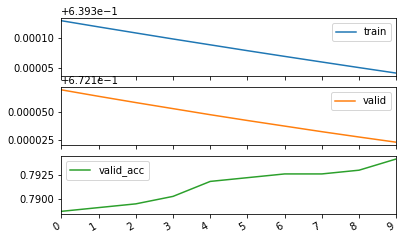

In [223]:
df.plot(subplots=True)

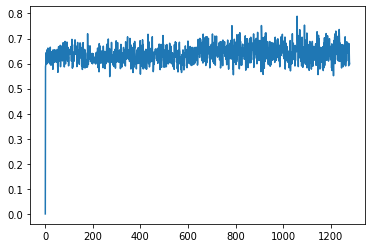

In [224]:
plt.plot(loss_list)

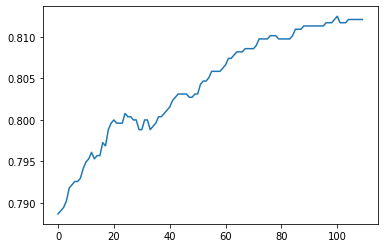

In [227]:
plt.plot(val_acc_list)

## Deep NB